In [151]:
#Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm
from collections import Counter
import statsmodels.api as sm
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')

In [95]:
!pip install xgboost

  Using cached xgboost-3.0.3-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.3-py3-none-win_amd64.whl (149.9 MB)


In [2]:
%reload_ext watermark

In [3]:
%watermark -a "Guilherme Silva"

Author: Guilherme Silva



In [4]:
%watermark --iversion

statsmodels: 0.14.2
pandas     : 2.2.2
matplotlib : 3.9.2
numpy      : 1.26.4
seaborn    : 0.13.2
tqdm       : 4.66.5
sklearn    : 1.5.1



In [5]:
# Importando a base de dados
df = pd.read_csv('dataset.csv')

In [6]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,103,30,38,83,43.3,0.183,33,0
1,1,115,70,30,96,34.6,0.529,32,1
2,3,126,88,41,235,39.3,0.704,27,0
3,8,99,84,0,0,35.4,0.388,50,0
4,7,196,90,0,0,39.8,0.451,41,1


In [28]:
def analise_exploratoria(df):

    """
    Realiza uma análise exploratória básica de um DataFrame.

    Exibe:
    - Informações estruturais (tipos, valores nulos, memória)
    - Estatísticas descritivas das colunas numéricas
    - Mapa de calor com a matriz de correlação

    Args:
        df (pandas.DataFrame): DataFrame contendo os dados a serem analisados.

    Returns:
        None: A função apenas exibe informações e gráficos.
    
    Requer:
        - matplotlib.pyplot como plt
        - seaborn como sns
        - pandas como pd
    """

    print("Análise estática\n")
    display(df.info())
    print('--------------------------------------------------\n')
    print("Análise estátistica\n")
    display(df.describe())
    print('--------------------------------------------------\n')
    print("Matrix de correlação\n")
    correlacao = df.corr()
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlacao, 
                annot=True,        # mostra os valores na célula
                cmap='coolwarm',   # paleta de cores
                vmin=-1, vmax=1)   # limite mínimo e máximo
    plt.title('Mapa de Calor da Correlação')
    plt.show()

def calcula_metricas(y_real,y_predito):

    """
    Calcula e exibe métricas de avaliação para modelos de classificação binária e também a matriz de confusão.

    As métricas exibidas incluem:
    - Acurácia
    - Precisão
    - Recall (Sensibilidade)
    - F1-Score
    - Matriz de confusão (visualizada como mapa de calor)

    Args:
        y_real (array-like): Valores reais das classes.
        y_predito (array-like): Valores previstos pelo modelo.

    Returns:
        None: A função apenas imprime os resultados e exibe gráficos.
    
    Requer:
        - `accuracy_score`, `precision_score`, `recall_score`, `f1_score`, `confusion_matrix` do `sklearn.metrics`
        - `matplotlib.pyplot` como `plt`
        - `seaborn` como `sns`
    """

    print("Acurácia", round(accuracy_score(y_real,y_predito),2))
    print("Precisão", round(precision_score(y_real,y_predito),2))
    print("Recall", round(recall_score(y_real,y_predito),2))
    print("F1", round(f1_score(y_real,y_predito),2),"\n")
    print("Matrix de confusão\n")
    

    cm = confusion_matrix(y_real, y_predito)

    # Plotando a matriz de confusão como mapa de calor
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.title('Matriz de Confusão')
    plt.show()
    


### Exploração e ajuste dos dados

In [24]:
df.head()

,Numero de filhos,Glicose,Pressão Arterial,Espessura da Pele,insulina,IMC,Função do Pedigree de Diabetes,Idade,Diabetica
0,1,103,30,38,83,43.3,0.183,33,0
1,1,115,70,30,96,34.6,0.529,32,1
2,3,126,88,41,235,39.3,0.704,27,0
3,8,99,84,0,0,35.4,0.388,50,0
4,7,196,90,0,0,39.8,0.451,41,1


In [26]:
df.Diabetica.value_counts()

Diabetica
0    500
1    268
Name: count, dtype: int64

In [9]:
# Ajustando os nomes das colunas para português
nome_col = {'Pregnancies': 'Numero de filhos', 'Glucose':'Glicose', 'BloodPressure': 'Pressão Arterial',
            'SkinThickness': 'Espessura da Pele', 'Insulin': 'insulina',
            'BMI': 'IMC',  'DiabetesPedigreeFunction': 'Função do Pedigree de Diabetes',
            'Age': 'Idade', 'Outcome': 'Diabetica'}

df = df.rename(columns= nome_col)


In [10]:
df.head()

,Numero de filhos,Glicose,Pressão Arterial,Espessura da Pele,insulina,IMC,Função do Pedigree de Diabetes,Idade,Diabetica
0,1,103,30,38,83,43.3,0.183,33,0
1,1,115,70,30,96,34.6,0.529,32,1
2,3,126,88,41,235,39.3,0.704,27,0
3,8,99,84,0,0,35.4,0.388,50,0
4,7,196,90,0,0,39.8,0.451,41,1


Análise estática

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Numero de filhos                768 non-null    int64  
 1   Glicose                         768 non-null    int64  
 2   Pressão Arterial                768 non-null    int64  
 3   Espessura da Pele               768 non-null    int64  
 4   insulina                        768 non-null    int64  
 5   IMC                             768 non-null    float64
 6   Função do Pedigree de Diabetes  768 non-null    float64
 7   Idade                           768 non-null    int64  
 8   Diabetica                       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

--------------------------------------------------

Análise estátistica



,Numero de filhos,Glicose,Pressão Arterial,Espessura da Pele,insulina,IMC,Função do Pedigree de Diabetes,Idade,Diabetica
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


--------------------------------------------------

Matrix de correlação



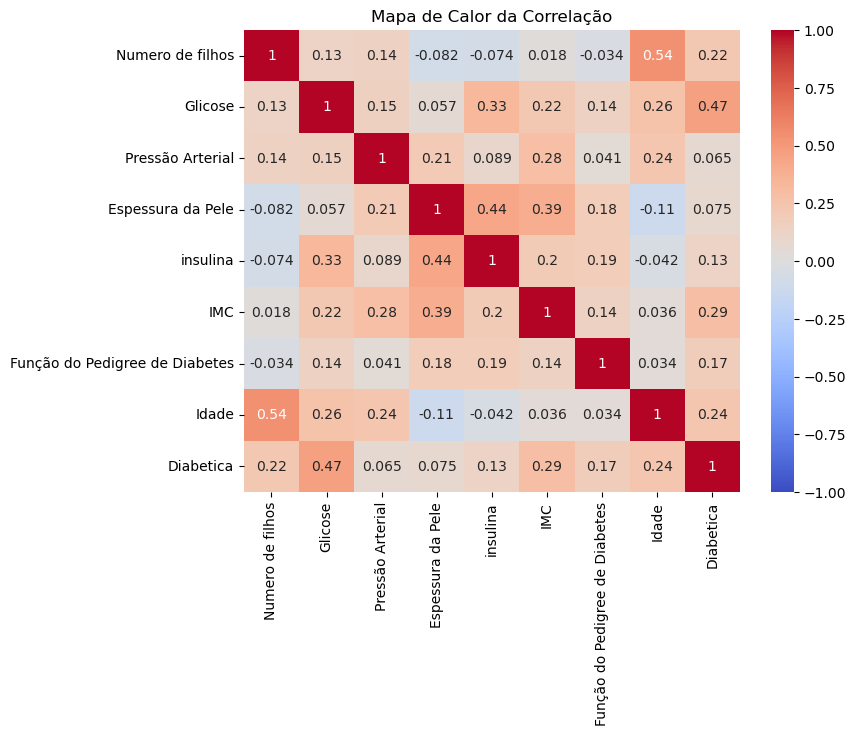

In [11]:
analise_exploratoria(df)

# Aplicando o modelo de machine Leraning para prever se a paciente possui ou não diabete

In [12]:
# Definindo a variável target (Diabetica) e ax features
X = df.drop(columns='Diabetica')
y = df.Diabetica

In [13]:
# Divisão de treino e teste
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [14]:
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [15]:
# Verificando as medidas estatisticas dos dados de treino
X_train.describe().round(2)

,Numero de filhos,Glicose,Pressão Arterial,Espessura da Pele,insulina,IMC,Função do Pedigree de Diabetes,Idade
count,614.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00
mean,3.96,121.76,69.39,20.65,76.81,32.13,0.47,33.30
std,3.45,32.66,19.28,15.98,113.44,7.88,0.33,11.67
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00
25%,1.00,100.00,64.00,0.00,0.00,27.40,0.24,24.00
50%,3.00,117.00,72.00,23.00,14.50,32.30,0.38,29.00
75%,6.00,141.00,80.00,33.00,124.25,36.80,0.62,41.00
max,17.00,199.00,122.00,99.00,846.00,59.40,2.42,81.00


In [16]:
# Verificando as medidas estatisticas dos dados de teste
X_test.describe().round(2)

,Numero de filhos,Glicose,Pressão Arterial,Espessura da Pele,insulina,IMC,Função do Pedigree de Diabetes,Idade
count,154.00,154.00,154.00,154.00,154.00,154.00,154.00,154.00
mean,3.38,117.45,67.95,20.08,91.73,31.46,0.47,33.02
std,3.01,28.90,19.68,15.90,121.84,7.92,0.32,12.16
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00
25%,1.00,97.25,60.00,0.00,0.00,26.88,0.25,24.00
50%,2.00,114.00,70.00,22.00,60.50,31.35,0.35,29.00
75%,5.00,135.00,78.00,32.00,143.75,35.40,0.65,37.75
max,15.00,198.00,110.00,60.00,680.00,67.10,1.70,72.00


Analise: Comparando as medidas estatisticas em dados de treino e teste verifica-se que estão bem proximas, 
isso significa que os dados de treino e teste POSSUEM distribuição semelhantes, dessa forma há menor risco de Overfitting,
bem como as métricas apuradas em dados de teste serão justas!


### 1º modelo: Regressão Logistica (Sem ajuste de parametros) : Baseline

In [17]:
# Instanciando o modelo de regressão logistica
model1 = LogisticRegression()

In [18]:
# Treinando o modelo
model1.fit(X_train, y_train)

LogisticRegression()

##### Resultados do Primeiro modelo


In [19]:
y_predito1 = model1.predict(X_test)

Acurácia 0.77
Precisão 0.74
Recall 0.48
F1 0.58 

Matrix de confusão



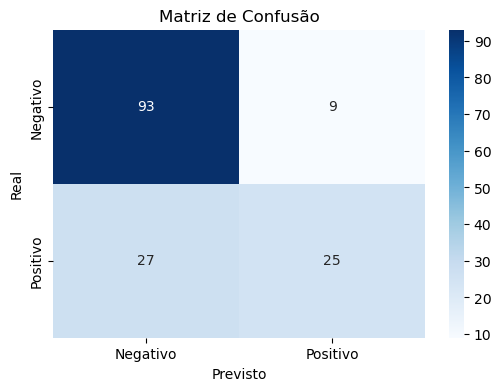

In [29]:
# Métricas
calcula_metricas(y_test, y_predito1)

#### Análise do resultado

Acurácia : O modelo acertou 77% das previsões totais.

Precisão: Quando o modelo previu "positivo", ele acertou 74% das vezes

Recall: O modelo identificou corretamente apenas 48% dos casos realmente positivos.

F1 Score: Média harmônica entre precisão e recall. Indica equilíbrio moderado.

Em geral, esse modelo não é recomendavel para produção, visto que dm 26% dos casos em que a paciente não tem diabetes o modelo aferiu que tem, ou seja, muitos falsos positivos. 

Bem como em 52% que são de fato positivos não foram previstos pelo modelo.


### Segundo modelo - Dando mais peso para classe minoritária

In [27]:
# Verificando a reprsentatividade de cada classe
y_train.value_counts(normalize=True)

Diabetica
0    0.648208
1    0.351792
Name: proportion, dtype: float64

In [30]:
# Variável para gravar a contagem de cada classe
class_counts = Counter(y_train)

In [32]:
class_counts

Counter({0: 398, 1: 216})

In [33]:
contagem = y_train.value_counts()

In [34]:
dict(contagem)

{0: 398, 1: 216}

In [35]:
total_amostras = len(y_train)

In [36]:
total_amostras

614

In [39]:
# Peso inversamente proporcional à frequência da classe
pesos = np.array([total_amostras / class_counts[y] for y in y_train])

In [40]:
model2 = LogisticRegression().fit(X_train, y_train, sample_weight=pesos)

In [41]:
y_predito2 = model2.predict(X_test)

Acurácia 0.73
Precisão 0.61
Recall 0.6
F1 0.6 

Matrix de confusão



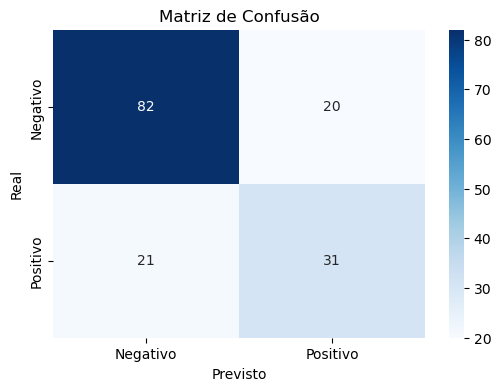

In [42]:
calcula_metricas(y_test, y_predito2)

#### Análise do resultado

Acurácia : O modelo acertou 73% das previsões totais.

Precisão: Quando o modelo previu "positivo", ele acertou 61% das vezes

Recall: O modelo identificou corretamente apenas 60% dos casos realmente positivos.

Em geral, esse modelo não é recomendavel para produção, visto que dm 39% dos casos em que a paciente não tem diabetes o modelo aferiu que tem, ou seja, muitos falsos positivos. 

Bem como em 40% que são de fato positivos não foram previstos pelo modelo.


### Modelo3 - Incluindo o parametro nativo class_weight='balanced' para balanceamento de classe.

In [50]:
model3 = LogisticRegression(max_iter=1000, class_weight='balanced').fit(X_train, y_train)

In [51]:
y_predito3 = model3.predict(X_test)

Acurácia 0.73
Precisão 0.6
Recall 0.6
F1 0.6 

Matrix de confusão



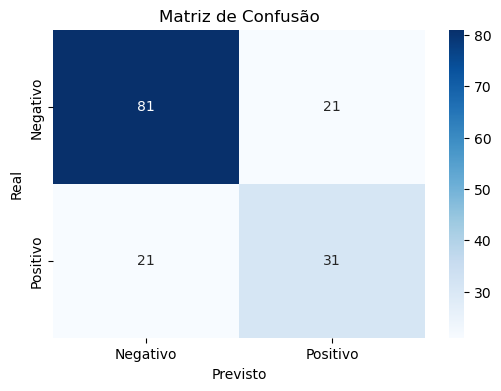

In [52]:
calcula_metricas(y_test, y_predito3)

#### Análise do resultado

Acurácia : O modelo acertou 73% das previsões totais.

Precisão: Quando o modelo previu "positivo", ele acertou 60% das vezes

Recall: O modelo identificou corretamente apenas 60% dos casos realmente positivos.

Em geral, esse modelo não é recomendavel para produção, visto que dm 40% dos casos em que a paciente não tem diabetes o modelo aferiu que tem, ou seja, muitos falsos positivos. 

Bem como em 40% que são de fato positivos não foram previstos pelo modelo.

### modelo 4 - acrescentando o parametro stratify=y

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=11, stratify=y)

In [54]:
model4= LogisticRegression(max_iter=1000, class_weight='balanced').fit(X_train,y_train)

In [55]:
y_predito4 = model4.predict(X_test)

Acurácia 0.77
Precisão 0.65
Recall 0.74
F1 0.69 

Matrix de confusão



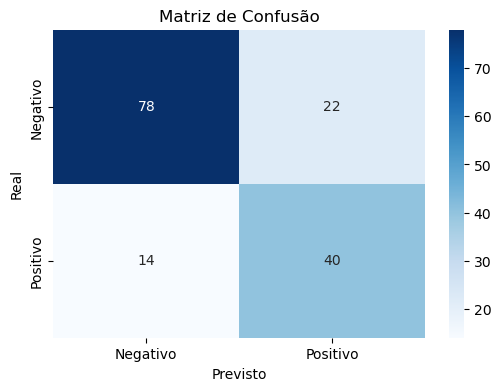

In [56]:
calcula_metricas(y_test, y_predito4)

#### Análise do resultado

Acurácia : O modelo acertou 77% das previsões totais.

Precisão: Quando o modelo previu "positivo", ele acertou 65% das vezes

Recall: O modelo identificou corretamente apenas 74% dos casos realmente positivos.

Em geral, esse modelo não é recomendavel para produção, visto que em 35% dos casos em que a paciente não tem diabetes o modelo aferiu que tem, ou seja, muitos falsos positivos. 

Bem como em 26% que são de fato positivos não foram previstos pelo modelo.

### Modelo 5 - Aplicando Feature Selection

Análise estática

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Numero de filhos                768 non-null    int64  
 1   Glicose                         768 non-null    int64  
 2   Pressão Arterial                768 non-null    int64  
 3   Espessura da Pele               768 non-null    int64  
 4   insulina                        768 non-null    int64  
 5   IMC                             768 non-null    float64
 6   Função do Pedigree de Diabetes  768 non-null    float64
 7   Idade                           768 non-null    int64  
 8   Diabetica                       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

--------------------------------------------------

Análise estátistica



,Numero de filhos,Glicose,Pressão Arterial,Espessura da Pele,insulina,IMC,Função do Pedigree de Diabetes,Idade,Diabetica
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


--------------------------------------------------

Matrix de correlação



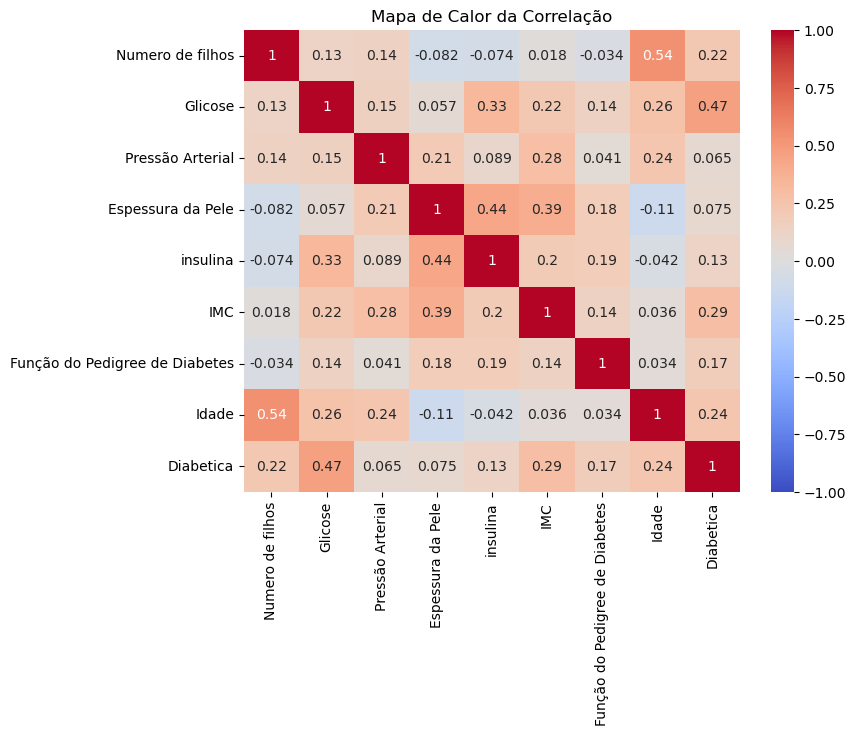

In [58]:
analise_exploratoria(df)

In [77]:
# Definindo threshold de 15%, colunas que possuem variância menor que 15 serão removidas
selector = VarianceThreshold(threshold=0.15)

In [78]:
# Aplicando o seletor
X_selected = selector.fit_transform(X)

In [80]:
# Resultado, corte de uma coluna que não faz diferença.
X_selected.shape

(768, 7)

In [81]:
X.shape

(768, 8)

In [82]:
X.head()

,Numero de filhos,Glicose,Pressão Arterial,Espessura da Pele,insulina,IMC,Função do Pedigree de Diabetes,Idade
0,1,103,30,38,83,43.3,0.183,33
1,1,115,70,30,96,34.6,0.529,32
2,3,126,88,41,235,39.3,0.704,27
3,8,99,84,0,0,35.4,0.388,50
4,7,196,90,0,0,39.8,0.451,41


In [83]:
# Separando em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_selected,y, test_size=0.2, random_state=11, stratify=y)

In [90]:
# Criando o modelo
model5 = LogisticRegression(max_iter=1000).fit(X_train, y_train)

In [91]:
y_predito5 = model5.predict(X_test)

Acurácia 0.79
Precisão 0.73
Recall 0.61
F1 0.67 

Matrix de confusão



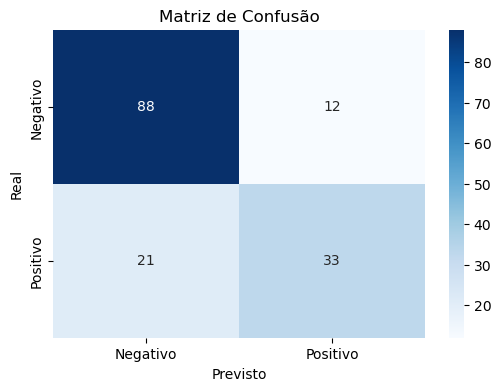

In [92]:
calcula_metricas(y_test, y_predito5)

#### Análise do resultado

Acurácia : O modelo acertou 79% das previsões totais.

Precisão: Quando o modelo previu "positivo", ele acertou 73% das vezes

Recall: O modelo identificou corretamente apenas 61% dos casos realmente positivos.

Em geral, esse modelo não é recomendavel para produção, visto que em 27% dos casos em que a paciente não tem diabetes o modelo aferiu que tem, ou seja, muitos falsos positivos. 

Bem como em 39% que são de fato positivos não foram previstos pelo modelo.

### Modelo6 - Aplicando o SelectBEst

In [98]:
# Aplicando o SelectBEst
seletor = SelectKBest(k=7)

In [99]:
X_select = seletor.fit(X,y)

In [100]:
seletor.scores_

array([ 39.67022739, 213.16175218,   3.2569504 ,   4.30438091,
        13.28110753,  71.7720721 ,  23.8713002 ,  46.14061124])

In [101]:
seletor.score_func

<function sklearn.feature_selection._univariate_selection.f_classif(X, y)>

In [102]:
X.head()

,Numero de filhos,Glicose,Pressão Arterial,Espessura da Pele,insulina,IMC,Função do Pedigree de Diabetes,Idade
0,1,103,30,38,83,43.3,0.183,33
1,1,115,70,30,96,34.6,0.529,32
2,3,126,88,41,235,39.3,0.704,27
3,8,99,84,0,0,35.4,0.388,50
4,7,196,90,0,0,39.8,0.451,41


In [103]:
seletor.get_feature_names_out()

array(['Numero de filhos', 'Glicose', 'Espessura da Pele', 'insulina',
       'IMC', 'Função do Pedigree de Diabetes', 'Idade'], dtype=object)

In [104]:
X_new = seletor.transform(X)

In [105]:
X_new

array([[  1.   , 103.   ,  38.   , ...,  43.3  ,   0.183,  33.   ],
       [  1.   , 115.   ,  30.   , ...,  34.6  ,   0.529,  32.   ],
       [  3.   , 126.   ,  41.   , ...,  39.3  ,   0.704,  27.   ],
       ...,
       [  5.   , 121.   ,  23.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,   0.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  31.   , ...,  30.4  ,   0.315,  23.   ]])

In [106]:
X_new.shape

(768, 7)

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X_new,y, test_size=0.2, random_state=11, stratify=y)

In [108]:
modelo6 = LogisticRegression(max_iter=1000, class_weight='balanced').fit(X_train,y_train)

In [109]:
y_predito6 = modelo6.predict(X_test)

Acurácia 0.75
Precisão 0.63
Recall 0.72
F1 0.67 

Matrix de confusão



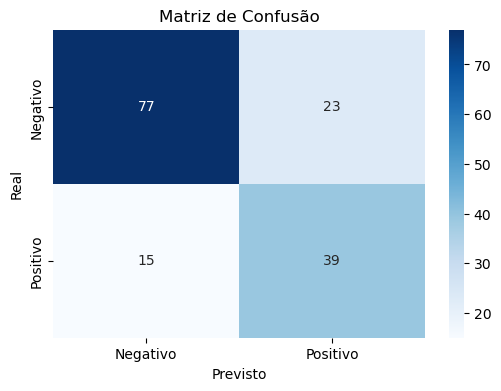

In [110]:
calcula_metricas(y_test, y_predito6)

#### Análise do resultado

Acurácia : O modelo acertou 75% das previsões totais.

Precisão: Quando o modelo previu "positivo", ele acertou 63% das vezes

Recall: O modelo identificou corretamente apenas 72% dos casos realmente positivos.

Em geral, esse modelo não é recomendavel para produção, visto que em 27% dos casos em que a paciente não tem diabetes o modelo aferiu que tem, ou seja, muitos falsos positivos. 

Bem como em 28% que são de fato positivos não foram previstos pelo modelo.

### modelo7 - aplicando arvore de decisão para seleção das melhores features

In [148]:
# Atribuindo a árvore de decisão a variável
clf = DecisionTreeClassifier(random_state=0,class_weight ='balanced')

In [149]:
# Treinando a árvore
clf = clf.fit(X,y)

In [150]:
# Verificando as melhores features
clf.feature_importances_

array([0.05097241, 0.31817726, 0.11469941, 0.03207021, 0.04116261,
       0.21115057, 0.10350096, 0.12826657])

In [152]:
estimador = DecisionTreeClassifier(random_state=0)

In [153]:
seletor = SelectFromModel(estimador)

In [154]:
seletor = seletor.fit(X,y)

In [155]:
seletor

SelectFromModel(estimator=DecisionTreeClassifier(random_state=0))

In [156]:
# Melhores Features
seletor.get_feature_names_out()

array(['Glicose', 'IMC', 'Função do Pedigree de Diabetes'], dtype=object)

In [157]:
X_nova = seletor.transform(X)

In [158]:
# Treinando o modelo com base na seleção das novas features
X_train, X_test, y_train, y_test = train_test_split(X_nova,y, test_size=0.2, random_state=11, stratify=y)

In [159]:
model7 = LogisticRegression(max_iter=1000,class_weight='balanced').fit(X_train,y_train)

In [160]:
y_predito7 = model7.predict(X_test)

Acurácia 0.72
Precisão 0.59
Recall 0.67
F1 0.63 

Matrix de confusão



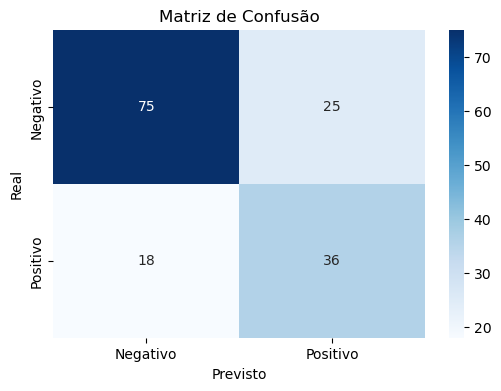

In [161]:
calcula_metricas(y_test, y_predito7)

#### Análise do resultado

Acurácia : O modelo acertou 72% das previsões totais.

Precisão: Quando o modelo previu "positivo", ele acertou 59% das vezes

Recall: O modelo identificou corretamente apenas 67% dos casos realmente positivos.

Em geral, esse modelo não é recomendavel para produção, visto que em 41% dos casos em que a paciente não tem diabetes o modelo aferiu que tem, ou seja, muitos falsos positivos. 

Bem como em 33% que são de fato positivos não foram previstos pelo modelo.

### modelo8 - aplicando rfe para seleção das melhores features

In [162]:
# Definindo oas parametros
sel = RFE(estimador, n_features_to_select=2, step=1)

In [163]:
sel = sel.fit(X,y)

In [165]:
# Ranking das melhores features
sel.ranking_

array([5, 1, 4, 7, 6, 1, 2, 3])

In [166]:
X.head(1)

,Numero de filhos,Glicose,Pressão Arterial,Espessura da Pele,insulina,IMC,Função do Pedigree de Diabetes,Idade
0,1,103,30,38,83,43.3,0.183,33


In [167]:
# Aplicando ao X
X_sel = sel.transform(X)

In [168]:
X_sel.shape

(768, 2)

In [170]:
# Treinando o modelo com base na técnica
X_train, X_test, y_train, y_test = train_test_split(X_sel,y, test_size=0.2, random_state=11, stratify=y)

In [174]:
model8 = LogisticRegression(max_iter=1000).fit(X_train,y_train)

In [175]:
y_predito8 = model8.predict(X_test)

Acurácia 0.77
Precisão 0.71
Recall 0.56
F1 0.62 

Matrix de confusão



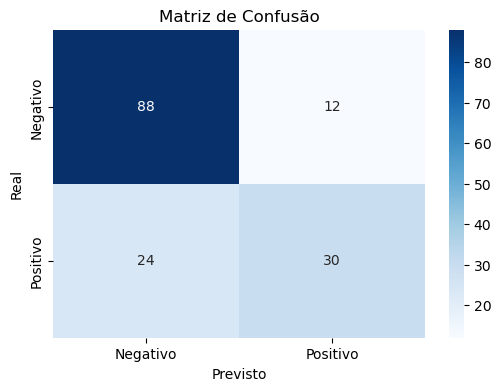

In [176]:
calcula_metricas(y_test, y_predito8)

#### Análise do resultado

Acurácia : O modelo acertou 77% das previsões totais.

Precisão: Quando o modelo previu "positivo", ele acertou 71% das vezes

Recall: O modelo identificou corretamente apenas 56% dos casos realmente positivos.

Em geral, esse modelo não é recomendavel para produção, visto que em 29% dos casos em que a paciente não tem diabetes o modelo aferiu que tem, ou seja, muitos falsos positivos. 

Bem como em 44% que são de fato positivos não foram previstos pelo modelo.

### Modelo 9 - Grid Serach

In [195]:
# Treinando o modelo com base na seleção das novas features
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=11, stratify=y)

In [196]:
parametros = {"penalty":['l1', 'l2', 'elasticnet', None],
              "class_weight": [None, 'dict', 'balanced'],
              "solver":['lbfgs','liblinea','saga','sag']}
                               

In [197]:
model8 = LogisticRegression(max_iter=5000)

In [198]:
grid = GridSearchCV(model8, parametros, cv=10, scoring='f1',verbose=15)


In [199]:
grid.fit(X_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV 1/10; 1/48] START class_weight=None, penalty=l1, solver=lbfgs...............
[CV 1/10; 1/48] END class_weight=None, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/10; 1/48] START class_weight=None, penalty=l1, solver=lbfgs...............
[CV 2/10; 1/48] END class_weight=None, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/10; 1/48] START class_weight=None, penalty=l1, solver=lbfgs...............
[CV 3/10; 1/48] END class_weight=None, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/10; 1/48] START class_weight=None, penalty=l1, solver=lbfgs...............
[CV 4/10; 1/48] END class_weight=None, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/10; 1/48] START class_weight=None, penalty=l1, solver=lbfgs...............
[CV 5/10; 1/48] END class_weight=None, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 6/10; 1/48] START class_weight=None, penalty=l1, solv

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=5000),
             param_grid={'class_weight': [None, 'dict', 'balanced'],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinea', 'saga', 'sag']},
             scoring='f1', verbose=15)

In [200]:
print(grid.best_params_ , grid.best_score_)

{'class_weight': 'balanced', 'penalty': None, 'solver': 'lbfgs'} 0.6702700641942085


In [201]:
y_predito = grid.predict(X_test)

In [202]:
y_predito

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0],
      dtype=int64)

Acurácia 0.76
Precisão 0.63
Recall 0.74
F1 0.68 

Matrix de confusão



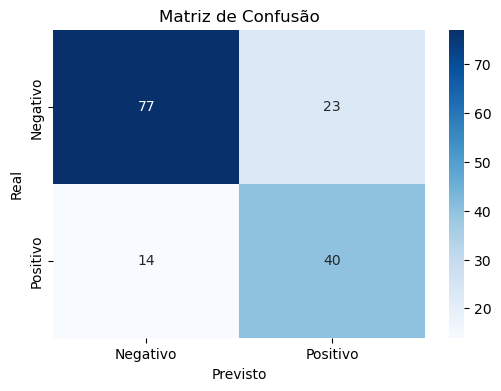

In [203]:
calcula_metricas(y_test, y_predito)

#### Análise do resultado

Acurácia : O modelo acertou 76% das previsões totais.

Precisão: Quando o modelo previu "positivo", ele acertou 63% das vezes

Recall: O modelo identificou corretamente apenas 74% dos casos realmente positivos.

Em geral, esse modelo não é recomendavel para produção, visto que em 37% dos casos em que a paciente não tem diabetes o modelo aferiu que tem, ou seja, muitos falsos positivos. 

Bem como em 26% que são de fato positivos não foram previstos pelo modelo.

In [208]:
%watermark -a 'Guilherme'

Author: Guilherme



In [209]:
%watermark --iversion

statsmodels: 0.14.2
seaborn    : 0.13.2
matplotlib : 3.9.2
numpy      : 1.26.4
pandas     : 2.2.2
xgboost    : 3.0.3
tqdm       : 4.66.5
sklearn    : 1.5.1

